# Notebook 6:  Clustering
### Feature Generation
* By calculating Spectral Centroid Arrays, Mean, Max and Min of the Spectral Centroid Arrays for 'E', 'f_tract' and 's_tract' features.
* By calculating Mean, Max and Min of 'energy', 'noise', 'pulse' and 'tone' features.

### Clustering
* After generating Features Applying different Clustering Algorithms.
* If the Feature Space is large (length of the Feature Vector) we can either select the best features or reduce dimension using Principal Component Analysis (PCA).

### Setting up working directory:

In [1]:
AED_C_dir = 'ESC50/Dataset'

### Importing necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import pickle
from sklearn.preprocessing import OneHotEncoder
import librosa.display
import librosa
import h5py

from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, SpectralClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

### Preprocessing and Feature Engineering

In [3]:
meta_data = pd.read_csv(AED_C_dir+'/metadata.csv')

In [4]:
ptne_features = np.load(AED_C_dir+'\ptne_features.npy')
spectrum_features = np.load(AED_C_dir+'\spectrum_features.npy')
meta_data = pd.read_csv(AED_C_dir+'/metadata.csv')

In [5]:
### Manually selecting 9 features
X = np.hstack((spectrum_features[:,-9:], ptne_features))
classes = meta_data['category'].unique()
Y = np.array([np.where(classes == meta_data['category'][i])[0][0] for i in range(len(meta_data))])

# Clustering

### K-Means
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Assigning points to clusters in an effort to minimize the Variance within each cluster. K is the number of clusters.

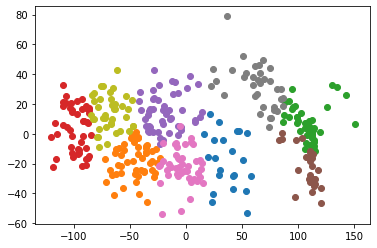

In [6]:
model = KMeans(n_clusters = 9)
model.fit(X) # Fitting the model
yhat = model.predict(X) # Assigning a cluster to each sample
clusters = np.unique(yhat) # Retrieving unique clusters
# Creating Scatter Plot for samples from each cluster
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
for cluster in clusters:
	# Getting row indexes for samples within this cluster
	row_ix = np.where(yhat == cluster)
	# Creating Scatter of these samples
	plt.scatter(principalComponents[row_ix, 0], principalComponents[row_ix, 1])

plt.show()

### Mean Shift
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

Mean shift clustering involves finding and adapting centroids based on the density of samples in the feature space. Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region.

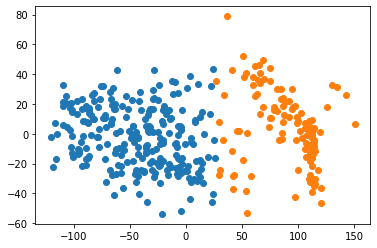

In [7]:
model = MeanShift()
# Fiting model and predicting clusters
yhat = model.fit_predict(X)
# Retrieving unique clusters
clusters = np.unique(yhat)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
for cluster in clusters:
	# Getting row indexes for samples within this cluster
	row_ix = np.where(yhat == cluster)
	# Creating Scatter of these samples
	plt.scatter(principalComponents[row_ix, 0], principalComponents[row_ix, 1])

plt.show()

### Gaussian Mixture Model
Reference: https://scikit-learn.org/stable/modules/mixture.html

The GaussianMixture implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models.

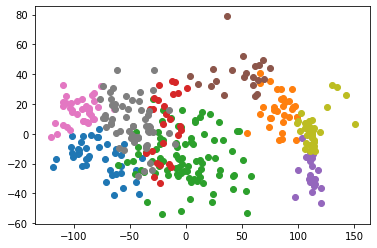

In [8]:
model = GaussianMixture(n_components=9)
model.fit(X) # Fitting the model
yhat = model.predict(X) # Assigning a cluster to each sample
clusters = np.unique(yhat) # Retrieving unique clusters
# Creating Scatter Plot for samples from each cluster
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
for cluster in clusters:
	# Getting row indexes for samples within this cluster
	row_ix = np.where(yhat== cluster)
	# Creating Scatter of these samples
	plt.scatter(principalComponents[row_ix, 0], principalComponents[row_ix, 1])

plt.show()

## Agglomerative Clustering
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Agglomerative clustering involves merging samples until the desired number of clusters is achieved.

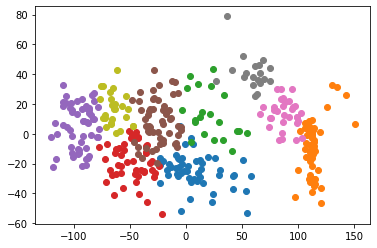

In [9]:
model = AgglomerativeClustering(n_clusters = 9)
yhat = model.fit_predict(X) # Assigning a cluster to each sample
clusters = np.unique(yhat) # Retrieving unique clusters
# Creating Scatter Plot for samples from each cluster
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
for cluster in clusters:
	# Getting row indexes for samples within this cluster
	row_ix = np.where(yhat == cluster)
	# Creating Scatter of these samples
	plt.scatter(principalComponents[row_ix, 0], principalComponents[row_ix, 1])

plt.show()

#### Conclusion: 
All clustering methods described and used above are examples of Unsupervised Learning where the Data Labels are not available. For any classification, Supervised Learning is the better approach where Labelled Data can be used to train the Machine Learning Algorithms.